In [119]:
import time
import os
import numpy as np
from PIL import Image, ImageDraw
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [120]:
%run ../sqlite_execution.py
db2 = DB_V2(dir_prefix="../")
for captcha_string in os.listdir("../../data/images/v2/"):
    db2.add_untracked_images(captcha_string)

Added 18 untracked images for elephant
Added 89 untracked images for parrot
Added 12 untracked images for squirrel
Added 151 untracked images for turtle


In [121]:
db2.get_info()
paths, positions = db2.get_solved_captchas(count=10)
images = [Image.open("../../data/images/v2/"+path) for path in paths]

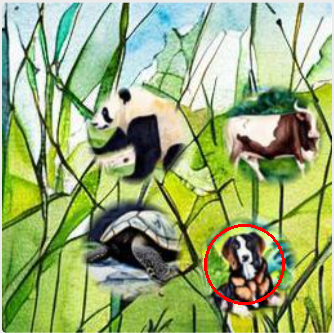

In [122]:
%run v2_handler.py
img = display_image_with_circle(images[0], positions[0])

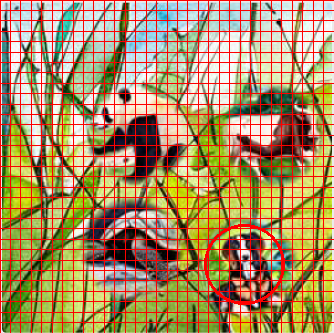

In [180]:
edit = img.copy()
draw = ImageDraw.Draw(edit)
grid_size = 32
for x in np.linspace(0, edit.width, grid_size+1):
    draw.line((x, 0, x, edit.height), fill="red", width=1)
for y in np.linspace(0, edit.height, grid_size+1):
    draw.line((0, y, edit.width, y), fill="red", width=1)
display(edit)

In [181]:
# all coordinates in the grid 
edit = img.copy()
draw = ImageDraw.Draw(edit)

coords = np.meshgrid(
    np.linspace(0+(img.width/grid_size)/2, img.width-(img.width/grid_size)/2, grid_size), 
    np.linspace(0+(img.height/grid_size)/2, img.height+(img.height/grid_size)/2, grid_size)
)
coords = np.stack(coords, axis=-1)
coords = coords.reshape(-1, 2)
coords.shape

(1024, 2)

0.9999995701428234


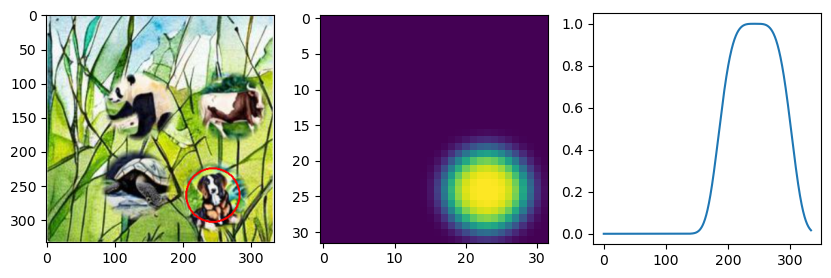

In [190]:
score = lambda x,y, target_x, target_y: np.e**(-(((x-target_x)**2 + (y-target_y)**2) * 0.00025)**2)
target_x, target_y = positions[0]
scores = np.array([score(x,y, target_x, target_y) for x,y in zip(coords[:,0], coords[:,1])])
print(scores.max())
scores_img = scores.reshape(grid_size,grid_size)
diag = np.vstack((np.linspace(0,img.width, num=1000), np.ones(1000)*target_y)).T

from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,3, figsize=(10,3))
axs[0].imshow(img)
axs[1].imshow(scores_img)
axs[2].plot(np.linspace(0,img.width, 1000), [score(diag[i][0], diag[i][1], target_x, target_y) for i in range(len(diag))])

<BarContainer object of 32 artists>

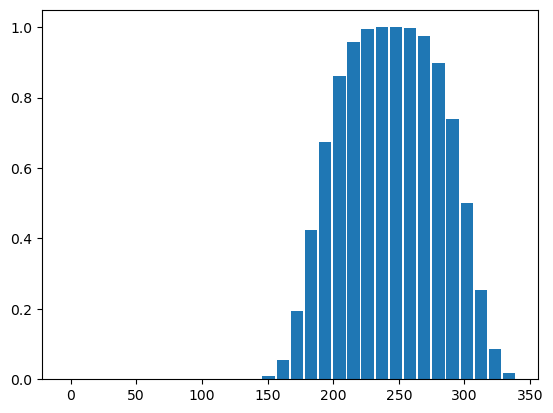

In [189]:
diag = np.vstack((np.linspace(0,img.width, num=grid_size), np.ones(grid_size)*target_y)).T
plt.bar(np.linspace(0,img.width, grid_size), [score(diag[i][0], diag[i][1], target_x, target_y) for i in range(len(diag))], width=(img.width/grid_size)*0.9)

In [127]:
pred = model.predict_pil(images)
pred

x shape: (10, 3, 333, 334)
[[0.4880656  0.5060806 ]
 [0.4800809  0.50256413]
 [0.47357783 0.49570245]
 [0.48497716 0.49534166]
 [0.48475888 0.5020137 ]
 [0.48840433 0.49941579]
 [0.49091452 0.49981695]
 [0.47719884 0.49244076]
 [0.4800002  0.49464855]
 [0.47772694 0.48214823]]


array([[163.01391053, 164.47515106],
       [160.34702146, 165.64614397],
       [158.17499429, 167.93108565],
       [161.98237008, 168.05122769],
       [161.90946716, 165.82944345],
       [163.12704742, 166.69455349],
       [163.96545088, 166.56095427],
       [159.38441229, 169.01722687],
       [160.32006609, 168.28202426],
       [159.56079674, 172.44463938]])

In [128]:
model.train(db2, epochs=20)

KeyboardInterrupt: 

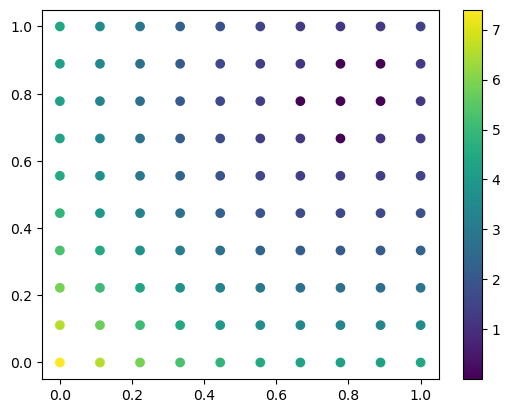

In [ ]:
inputs = np.linspace(0,1,100)
xx, yy = np.meshgrid(inputs, inputs)
coordinates = np.vstack([xx.ravel(), yy.ravel()]).T
coordinates_torch = torch.from_numpy(coordinates).float()
output = np.tile(np.array([0.8,0.8]), (len(coordinates),1))
output_torch = torch.from_numpy(output).float()
# get loss of coordinates by EuclideanDistanceLoss
squared_diff = (output_torch - coordinates_torch) ** 2  
sum_squared_diff = torch.sum(squared_diff, dim=1)  

euclidean_distance = sum_squared_diff
scaled_distance = torch.where(euclidean_distance < 0.025, euclidean_distance*0.2, (5*euclidean_distance) + 1)
loss = scaled_distance.detach().numpy()
from matplotlib import pyplot as plt
plt.scatter(coordinates[:,0], coordinates[:,1], c=loss)
plt.colorbar()

[[0.         0.        ]
 [0.01010101 0.01010101]
 [0.02020202 0.02020202]
 [0.03030303 0.03030303]
 [0.04040404 0.04040404]
 [0.05050505 0.05050505]
 [0.06060606 0.06060606]
 [0.07070707 0.07070707]
 [0.08080808 0.08080808]
 [0.09090909 0.09090909]
 [0.1010101  0.1010101 ]
 [0.11111111 0.11111111]
 [0.12121212 0.12121212]
 [0.13131313 0.13131313]
 [0.14141414 0.14141414]
 [0.15151515 0.15151515]
 [0.16161616 0.16161616]
 [0.17171717 0.17171717]
 [0.18181818 0.18181818]
 [0.19191919 0.19191919]
 [0.2020202  0.2020202 ]
 [0.21212121 0.21212121]
 [0.22222222 0.22222222]
 [0.23232323 0.23232323]
 [0.24242424 0.24242424]
 [0.25252525 0.25252525]
 [0.26262626 0.26262626]
 [0.27272727 0.27272727]
 [0.28282828 0.28282828]
 [0.29292929 0.29292929]
 [0.3030303  0.3030303 ]
 [0.31313131 0.31313131]
 [0.32323232 0.32323232]
 [0.33333333 0.33333333]
 [0.34343434 0.34343434]
 [0.35353535 0.35353535]
 [0.36363636 0.36363636]
 [0.37373737 0.37373737]
 [0.38383838 0.38383838]
 [0.39393939 0.39393939]


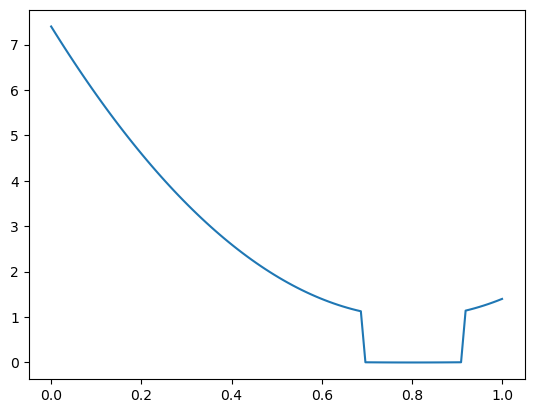

In [ ]:
coords = np.repeat(np.linspace(0,1,100).reshape(-1,1),2, axis=1)
print(coords)
target = np.repeat([[0.8,0.8]], 100, axis=0)
print(target)
squared_diff = (torch.Tensor(target) - torch.tensor(coords)) ** 2  
sum_squared_diff = torch.sum(squared_diff, dim=1)  

euclidean_distance = sum_squared_diff
scaled_distance = torch.where(euclidean_distance < 0.025, euclidean_distance*0.2, (5*euclidean_distance) + 1)
loss = scaled_distance.detach().numpy()
print(loss)
from matplotlib import pyplot as plt
plt.plot(coords[:,0], loss)


In [ ]:
%run v2_training.py
images = [Image.open("../../data/images/v2/"+path) for path in db2.get_solved_captchas(count=10)[0]]
pred = model.predict_pil(images)
pred

In [ ]:
%run v2_handler.py
for i in range(len(images)):
    display_image_with_circle(images[i], pred[i])

In [ ]:
assert 1 == 0

In [ ]:
%run v2_manual_classifier.py
Manual_Classifier(db2)

In [ ]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--enable-features=DarkMode")
# options.add_argument("--headless")

wd = webdriver.Chrome(options)
wd.get("https://accounts.hcaptcha.com/demo")

In [ ]:
image_paths = db2.get_unsolved_captchas()
for i in range(len(image_paths)):
    image = Image.open("../"+image_paths[i])
    display(image)

In [ ]:
%run v2_handler.py
v2h = V2_Handler(db2)
v2h.solve_v2(wd)